In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image

from matplotlib.patches import Rectangle
from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
DIRECTORY = "/content/drive/MyDrive/Custom_Dataset"

(250, 250, 3, 3)


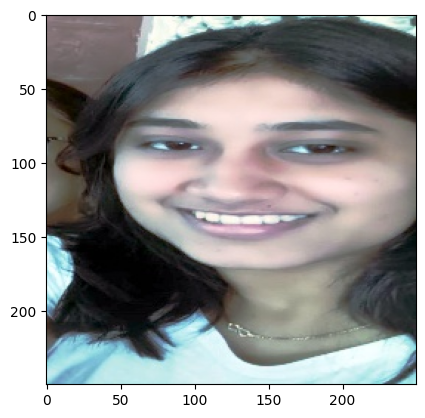

In [ ]:
filename = "/content/drive/MyDrive/Custom_Dataset/Niharika/20.jpg"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
def load_dataset(directory):
    images = []
    labels = []
    for subdir in os.listdir(directory):
        # Path to subfolder
        folder_path = os.path.join(directory, subdir)

        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                # Skip non-image files
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(folder_path, file)
                    img = load_img(img_path, target_size=(250, 250))
                    img = img_to_array(img)
                    img /= 255.0  # Normalize to [0, 1]
                    images.append(img)
                    labels.append(subdir)  # Subfolder name as label

    return np.array(images), np.array(labels)

# Base directory containing subfolders with images
base_dir = DIRECTORY
images, labels = load_dataset(base_dir)

In [ ]:
print(images.shape)
print(labels.shape)

(2816, 250, 250, 3)
(2816,)


In [ ]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

print(f'Training samples: {x_train.shape[0]}, Validation samples: {x_val.shape[0]}')

Training samples: 2252, Validation samples: 564


In [ ]:
categorical_labels.shape


(2816, 39)

CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Number of classes
num_classes = y_train.shape[1]

# Define the model
model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flattening the 3D outputs to 1D
    Flatten(),

    # Fully connected Dense layer 1
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 248, 248, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 124, 124, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 122, 122, 64)      2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=25,  # You can adjust this number as required
    batch_size=32,  # Adjust the batch size according to your system's capabilities
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/25
71/71 [==============================] - 25s 224ms/step - loss: 2.7723 - accuracy: 0.3277 - val_loss: 12.7683 - val_accuracy: 0.0284
Epoch 2/25
71/71 [==============================] - 12s 169ms/step - loss: 0.6944 - accuracy: 0.8131 - val_loss: 16.0498 - val_accuracy: 0.0319
Epoch 3/25
71/71 [==============================] - 13s 178ms/step - loss: 0.2668 - accuracy: 0.9356 - val_loss: 11.7251 - val_accuracy: 0.0319
Epoch 4/25
71/71 [==============================] - 12s 176ms/step - loss: 0.1132 - accuracy: 0.9751 - val_loss: 7.3950 - val_accuracy: 0.1259
Epoch 5/25
71/71 [==============================] - 12s 176ms/step - loss: 0.0635 - accuracy: 0.9911 - val_loss: 5.0317 - val_accuracy: 0.1649
Epoch 6/25
71/71 [==============================] - 13s 176ms/step - loss: 0.0312 - accuracy: 0.9951 - val_loss: 2.9461 - val_accuracy: 0.3333
Epoch 7/25
71/71 [==============================] - 12s 176ms/step - loss: 0.0226 - accuracy: 0.9973 - val_loss: 1.1955 - val_accuracy: 0.6

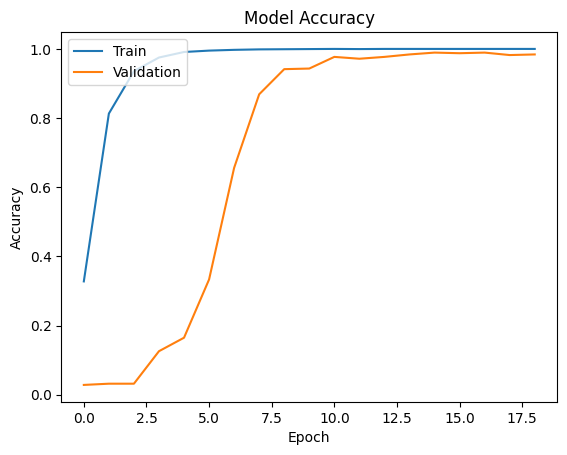

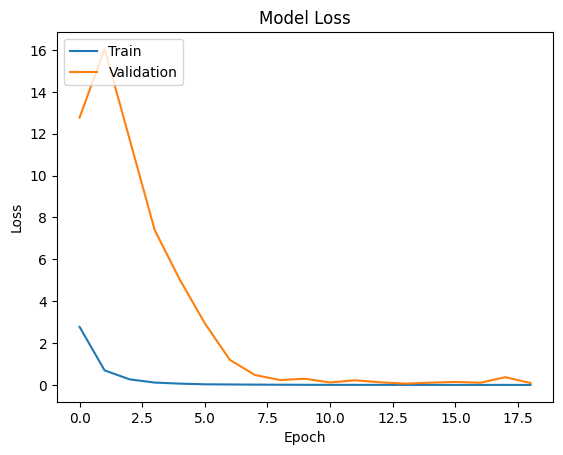

In [ ]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Predict classes on the validation set
y_pred = model.predict(x_val, batch_size=32)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
report = classification_report(y_true, y_pred_classes, target_names=encoder.classes_)

accuracy_percentage = accuracy * 100

# Overall precision, recall, f1-score
overall_precision = precision_score(y_true, y_pred_classes, average='weighted')
overall_recall = recall_score(y_true, y_pred_classes, average='weighted')
overall_f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Overall Accuracy: {accuracy_percentage:.3f}%')
print(f'Overall Precision: {overall_precision:.3f}')
print(f'Overall Recall: {overall_recall:.3f}')
print(f'Overall F1-Score: {overall_f1:.3f}')

print(report)

18/18 [==============================] - 1s 34ms/step
Overall Accuracy: 98.404%
Overall Precision: 0.985
Overall Recall: 0.984
Overall F1-Score: 0.984
                 precision    recall  f1-score   support

         Adarsh       1.00      1.00      1.00        14
         Akriti       0.86      1.00      0.92         6
         Amisha       1.00      1.00      1.00        15
          Ankit       1.00      1.00      1.00        16
   Ankit Samota       1.00      1.00      1.00        16
          Ankur       1.00      1.00      1.00         6
         Anshul       1.00      0.95      0.97        19
         Anupam       0.94      1.00      0.97        17
Anurag K bharti       1.00      1.00      1.00        14
         Ashwin       1.00      0.94      0.97        16
         Debesh       0.94      0.94      0.94        17
         Hardik       1.00      1.00      1.00        12
     Hrishikesh       1.00      1.00      1.00        12
          Jatin       1.00      0.95      0.97    

18/18 [==============================] - 0s 26ms/step


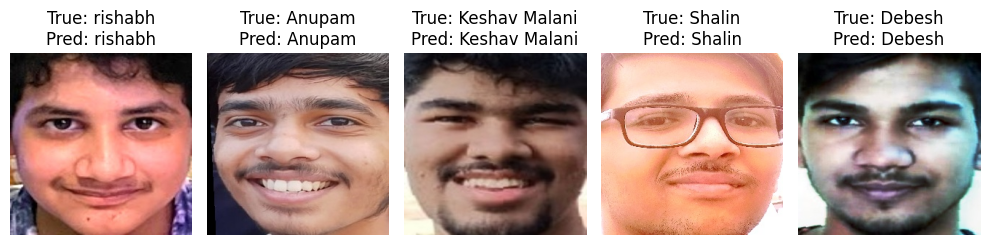

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images, true labels, and predicted labels in a larger subplot
def display_images_with_predictions(images, true_labels, predicted_labels, encoder, num_images=5):
    indices = np.random.choice(range(len(images)), num_images)
    plt.figure(figsize=(num_images * 2, 4))

    for i, index in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        true_label = encoder.inverse_transform([np.argmax(true_labels[index])])[0]
        predicted_label = encoder.inverse_transform([predicted_labels[index]])[0]
        plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate predictions for the images
predicted_probs = model.predict(x_val, batch_size=32)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Display images with true and predicted labels
display_images_with_predictions(x_val, y_val, predicted_classes, encoder)

In [ ]:
model.save("/content/drive/MyDrive/CV_Dataset_Utilities/LFW_model.h5")
print("Model saved")

Model saved


In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/CV_Dataset_Utilities/LFW_model.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open("converted_model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/CV_Dataset_Utilities/LFW_model.h5")

# Convert the model to TensorFlow Lite format with post-training quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
print("Debugging")
# Save the quantized TensorFlow Lite model
with open("quantized_model.tflite", "wb") as f:
    f.write(tflite_quantized_model)
    print("Quantized model saved.")

Debugging
Quantized model saved.
